In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Toddler_Autism_SVM.csv')
df.shape

(1054, 19)

In [3]:
df["Sexn"]= pd.factorize(df.Sex)[0]
df["Ethnicityn"]= pd.factorize(df.Ethnicity)[0]
df["Jaundicen"]= pd.factorize(df.Jaundice)[0]
df["Family_mem_with_ASDn"]= pd.factorize(df.Family_mem_with_ASD)[0]
df["Who_completed_the_testn"]= pd.factorize(df.Who_completed_the_test)[0]
df["resn"]= pd.factorize(df.res)[0]

In [4]:
df.Ethnicity.value_counts()

White European    334
asian             299
middle eastern    188
south asian        60
black              53
Hispanic           40
Others             35
Latino             26
mixed               8
Pacifica            8
Native Indian       3
Name: Ethnicity, dtype: int64

In [6]:
dm=df.drop(['Case_No','Sex', 'Ethnicity','Jaundice','Family_mem_with_ASD','Who_completed_the_test','res'], axis=1)
dm.head(2)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sexn,Ethnicityn,Jaundicen,Family_mem_with_ASDn,Who_completed_the_testn,resn
0,0,0,0,0,0,0,1,1,0,1,28,3,0,0,0,0,0,0
1,1,1,0,0,0,1,1,0,0,0,36,4,1,1,0,0,0,0


In [7]:
dm=(dm - dm.min()) / (dm.max() - dm.min()) 

In [8]:
dm.head(2)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sexn,Ethnicityn,Jaundicen,Family_mem_with_ASDn,Who_completed_the_testn,resn
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.666667,0.3,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.000000,0.4,1.0,0.1,0.0,0.0,0.0,0.0


In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = dm.iloc[:,2:16]  #independent columns
y = dm.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

plt.show()

             Specs     Score
2               A5  8.156416
1               A4  6.329031
4               A7  6.096563
0               A3  5.769238
6               A9  5.051528
3               A6  3.744287
9   Qchat-10-Score  3.451887
11      Ethnicityn  1.158662
7              A10  0.633602
8         Age_Mons  0.372410


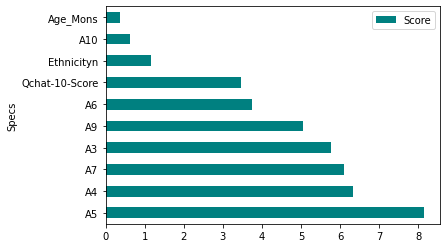

In [10]:
f = featureScores.nlargest(10,'Score')
f.plot(x= 'Specs', y = 'Score', kind='barh', color ='teal')
#featureScores.plot(kind='barh', nlargest(10),color ='teal')
plt.show()

In [11]:
dm.columns
feature_df = dm[['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','Qchat-10-Score', 'Age_Mons','Ethnicityn','Sexn', 'Jaundicen','Family_mem_with_ASDn','Who_completed_the_testn']]

X = np.asarray(feature_df)
y = np.asarray(dm['resn'])


y[0:15]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
X_test.shape

(211, 17)

In [13]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score

print('Accuracy score: ',accuracy_score(y_test, y_pred))

Accuracy score:  0.7298578199052133


In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[154   0]
 [ 57   0]]
              precision    recall  f1-score   support

         0.0       0.73      1.00      0.84       154
         1.0       0.00      0.00      0.00        57

    accuracy                           0.73       211
   macro avg       0.36      0.50      0.42       211
weighted avg       0.53      0.73      0.62       211



C:\Users\kawsh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
